In [1]:
import cv2
print(cv2.__version__)

from os import path

from skimage import io

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.ndimage.morphology import binary_fill_holes as bfh


from os import path
import time

4.5.5


# Basic Image Analysis with OpenCV

## Sumary
- Load/Show image
- Color conversion
- Histograms
- Elemental operations
    - Image transformation
    - Blending
- Border detection
- Image segmentation
- Shape descriptors
- Texture descriptors
- Other: 
    - Webcam proccesing
    - Face detection
    


## Load / Show

In [2]:
people_path = path.join("res", "Lena_RGB.png")

In [3]:
# Load img
img = cv2.imread(people_path)

if(img.data == None):
    print(f'Could not open or find the image')
    

In [4]:
# read Pixel
img[0,0]

array([124, 135, 225], dtype=uint8)

In [5]:
# Show img
cv2.imshow('Image', img)
cv2.waitKey(0)
cv2.destroyWindow('Image')

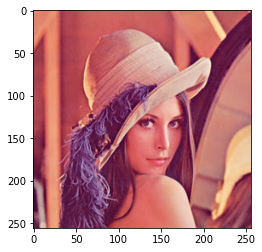

In [6]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

## Color conversion and local save

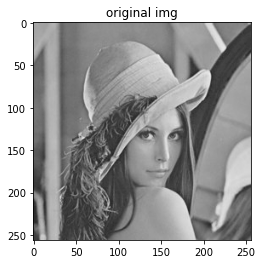

True

In [7]:
## FLAGS
#   1 or IMREAD_COLOR (default)
#   0 or IMREAD_GRAYSCALE: load an image in grayscale mode
#  -1 or IMREAD_UNCHANGED: load an image including alpha channel

img = cv2.imread('res/Lena_RGB.png', cv2.IMREAD_GRAYSCALE) 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # to RGB

plt.imshow(img)
plt.title('original img')
plt.show()


cv2.imwrite('res/Lena_RGB_BW.png', img)

- Color RGB, Red Green Blue
- Pixel Range: 0 - 255
- OpenCV opens img in BGR as default

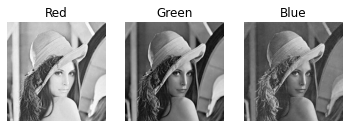

<class 'numpy.ndarray'>
[[124 124 124 ... 127 122 103]
 [125 124 122 ... 144 132  97]
 [122 122 119 ... 134 119  86]
 ...
 [ 63  64  62 ...  71  74  75]
 [ 62  60  60 ...  82  80  75]
 [ 60  57  57 ...  90  83  77]]


In [104]:
# Decompose image into components
img = cv2.imread('res/Lena_RGB.png')

(B, G, R) = cv2.split(img)

fig, ax = plt.subplots(1,3)
ax[0].imshow(R, cmap='gray'), ax[0].set_title('Red')
ax[0].axis('off')
ax[1].imshow(G, cmap='gray'), ax[1].set_title('Green')
ax[1].axis('off')
ax[2].imshow(B, cmap='gray'), ax[2].set_title('Blue')
ax[2].axis('off')
plt.show()

print(type(B))
print(B)

In [9]:
# Recompose
img_alt = cv2.merge((B,R,G))

- Save image

In [10]:
lena_alt_path = path.join("res", "lena_alt.jpg")
cv2.imwrite(lena_alt_path, img_alt)

True

## Histograms

### Calculate and save histograms

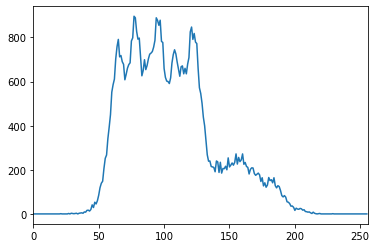

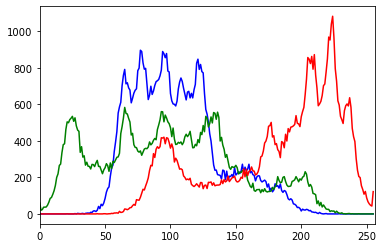

In [12]:
img = cv2.imread('res/Lena_RGB.png')

## ON THE CHANNELS - OPENCV
## 1. Channel to channel
hist = cv2.calcHist([img],[0],None,[256],[0,256])
plt.xlim([0, 256])
plt.plot(hist)
plt.show()

## 2. One for each channel (without using plt.plot(hist))
img = cv2.imread('res/Lena_RGB.png')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()


## ON THE FULL IMAGE
## 1. NUMPY 
# hist,bins = np.histogram(img.ravel(),256,[0,256]) 
# plt.xlim([0, 256])
# plt.plot(hist)
# plt.show()

# ## 2. MATPLOTLIB
# plt.hist(img.ravel(),256,[0,256])
# plt.xlim([0, 256])
# plt.show()

## SAVE IMAGE IN LOCAL MEMORY
# plt.hist(img.ravel(),256,[0,256])
# plt.title('Mean')
# plt.xlabel("value")
# plt.ylabel("Frequency")
# plt.savefig('images/Lena_hist.png')

### Equalize histogram

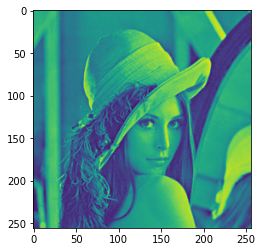

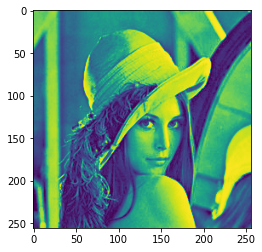

In [13]:
img = cv2.imread('res/Lena_RGB.png', cv2.IMREAD_GRAYSCALE)
img_equ = cv2.equalizeHist(img)

plt.imshow(img)
plt.show()
plt.imshow(img_equ)
plt.show()

## Elemental operations

### Calculate brightness and contrast

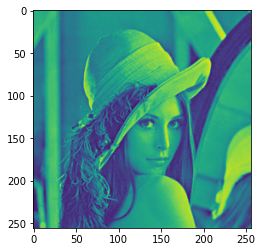

brightness: 132.36602783203125
contrast: 44.81712578756081


In [115]:
# Read grayscale image and return brightness and contrast
img = cv2.imread('res/Lena_RGB.png', 0)
img_equ = cv2.equalizeHist(img)

plt.imshow(img)
plt.show()

brillo = cv2.mean(img) # returns the mean of the values in an array -> brightness

h = img.shape[0] # cols
w = img.shape[1] # rows
num_pixeles = h * w

suma = 0
for i in range(0, h):
    for j in range(0, w):
        suma = suma + (img[i][j] - brillo[0])**2
        
contraste = (suma/num_pixeles)**(1/2)



print(f'brightness: {brillo[0]}')
print(f'contrast: {contraste}')

### Intesity transformations

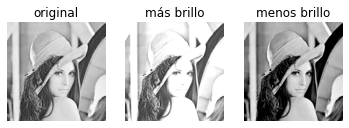

In [103]:
# Birghtness change
img = cv2.imread('res/Lena_RGB.png')
img = img[:,:,2] # red color

mas_brillo = 50
menos_brillo = -100
mas_brillo_img = cv2.add(img, mas_brillo) # Important the "cv2.add" instead of "+"
menos_brillo_img = cv2.add(img, menos_brillo)

fig, ax = plt.subplots(1,3)
ax[0].imshow(img, cmap='gray'), ax[0].set_title('original')
ax[0].axis('off')
ax[1].imshow(mas_brillo_img, cmap='gray'), ax[1].set_title('más brillo')
ax[1].axis('off')
ax[2].imshow(menos_brillo_img, cmap='gray'), ax[2].set_title('menos brillo')
ax[2].axis('off')
plt.show()

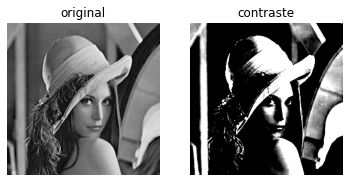

In [105]:
# Contrast change according to the GIMP program
img = cv2.imread('res/Lena_RGB.png')
img = img[:,:,1] # green channel

contraste = 100

f = 131*(contraste + 127)/(127*(131-contraste))
alpha_c = f
gamma_c = 127*(1-f)

contrast_img = cv2.addWeighted(img, alpha_c, img, 0, gamma_c)

fig, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray'), ax[0].set_title('original')
ax[0].axis('off')
ax[1].imshow(contrast_img, cmap='gray'), ax[1].set_title('contraste')
ax[1].axis('off')
plt.show()

# To view the image when the contrast is decreased...
#cv2.imwrite('contrast.png', contrast_img)

### Color Space Conversions

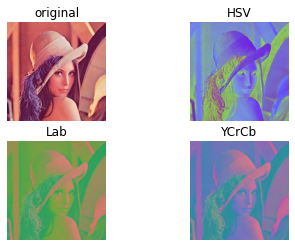

In [107]:
img = io.imread('res/Lena_RGB.png')

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # gray-scale

HSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) # (H)ue, (S)aturation and (V)alue

Lab = cv2.cvtColor(img, cv2.COLOR_BGR2Lab) # (L)uminosidad, a-b colores complementarios

YCrCb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb) # Y-Luma, Cr-Cb crominancia rojo y azul

fig, ax = plt.subplots(2,2)
ax[0,0].imshow(img.astype('uint8'), cmap='gray'), ax[0,0].set_title('original')
ax[0,0].axis('off')
ax[0,1].imshow(HSV.astype('uint8'), cmap='gray'), ax[0,1].set_title('HSV')
ax[0,1].axis('off')
ax[1,0].imshow(Lab.astype('uint8'), cmap='gray'), ax[1,0].set_title('Lab')
ax[1,0].axis('off')
ax[1,1].imshow(YCrCb.astype('uint8'), cmap='gray'), ax[1,1].set_title('YCrCb')
ax[1,1].axis('off')
plt.show()

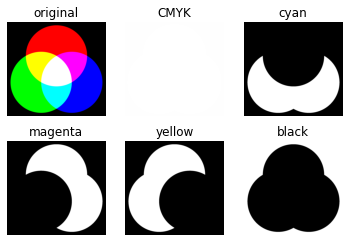

In [108]:
# RGB to CMYK
import numpy as np
from skimage import io

img = io.imread('res/colores.png')
rgb = cv2.imread('res/colores.png').astype('uint8')
rgb = rgb.astype('uint8')/255

with np.errstate(invalid='ignore', divide='ignore'):
    K = 1 - np.max(rgb, axis=2)
    C = (1-rgb[...,2] - K)/(1-K)
    M = (1-rgb[...,1] - K)/(1-K)
    Y = (1-rgb[...,0] - K)/(1-K)

CMYK = (np.dstack((C,M,Y,K)))
C,M,Y,K = cv2.split(CMYK)

fig, ax = plt.subplots(2,3)
ax[0,0].imshow(img, cmap='gray'), ax[0,0].set_title('original')
ax[0,0].axis('off')
ax[0,1].imshow(CMYK.astype('uint8'), cmap='gray'), ax[0,1].set_title('CMYK')
ax[0,1].axis('off')
ax[0,2].imshow(C.astype('uint8'), cmap='gray'), ax[0,2].set_title('cyan')
ax[0,2].axis('off')
ax[1,0].imshow(M.astype('uint8'), cmap='gray'), ax[1,0].set_title('magenta')
ax[1,0].axis('off')
ax[1,1].imshow(Y.astype('uint8'), cmap='gray'), ax[1,1].set_title('yellow')
ax[1,1].axis('off')
ax[1,2].imshow(K.astype('uint8'), cmap='gray'), ax[1,2].set_title('black')
ax[1,2].axis('off')
plt.show()

### Geometric tranformations

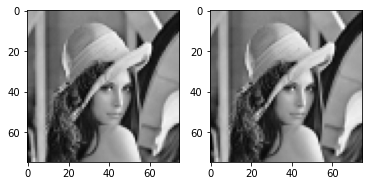

In [112]:
# Change spatial resolution (resize)
img = cv2.imread('res/Lena_RGB.png', 0)

h = img.shape[0] # cols
w = img.shape[1] # rows


# 50% of original size
resized = cv2.resize(img, (int(h*0.5),int(w*0.5)), interpolation = cv2.INTER_AREA)

# size of 75x75
resized = cv2.resize(img, (75,75), interpolation = cv2.INTER_AREA)

figs, ax = plt.subplots(1,2)
ax[0].imshow(resized, cmap='gray')
ax[1].imshow(resized, cmap='gray')
plt.show()

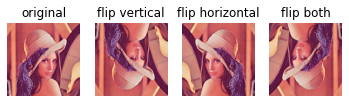

In [102]:
# Flipping
img = io.imread('res/Lena_RGB.png')
  
flipVertical = cv2.flip(img, 0)
flipHorizontal = cv2.flip(img, 1)
flipBoth = cv2.flip(img, -1)
 
figs, ax = plt.subplots(1,4)
ax[0].imshow(img, cmap='gray'), ax[0].set_title('original')
ax[0].axis('off')
ax[1].imshow(flipVertical, cmap='gray'), ax[1].set_title('flip vertical')
ax[1].axis('off')
ax[2].imshow(flipHorizontal, cmap='gray'), ax[2].set_title('flip horizontal')
ax[2].axis('off')
ax[3].imshow(flipBoth, cmap='gray'), ax[3].set_title('flip both')
ax[3].axis('off')

plt.show()

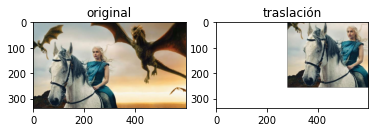

In [8]:
# Traslation
img = io.imread('res/GOT.png')
rows, cols, ch = img.shape
 
M = np.float32([[1,0,280],[0,1,-80]]) # Defino la matriz de transformación
new_img = cv2.warpAffine(img,M,(cols,rows)) # Aplico la transformación

figs, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray'), ax[0].set_title('original')
ax[1].imshow(new_img, cmap='gray'), ax[1].set_title('traslación')
plt.show()

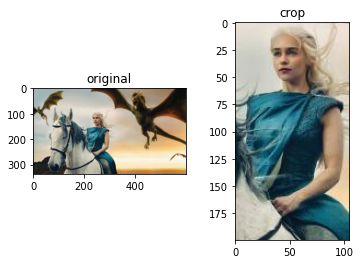

In [9]:
# Cropping
img = io.imread('res/GOT.png')

new_img = img[90:290, 200:305]

figs, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray'), ax[0].set_title('original')
ax[1].imshow(new_img, cmap='gray'), ax[1].set_title('crop')
plt.show()

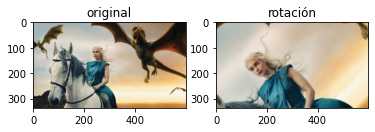

In [17]:
# Rotation
img = io.imread('res/GOT.png')
rows, cols, ch = img.shape

M = cv2.getRotationMatrix2D((cols/2,rows/2),angle=45,scale=2) # Defino la matriz de transformación
new_img = cv2.warpAffine(img,M,(cols,rows)) # Aplico la transformación

figs, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray'), ax[0].set_title('original')
ax[1].imshow(new_img, cmap='gray'), ax[1].set_title('rotación')
plt.show()

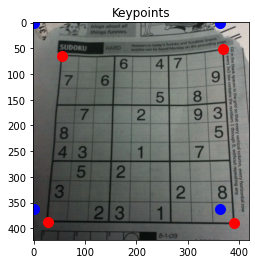

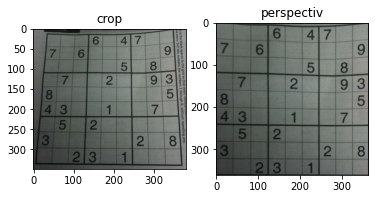

In [114]:
# Perspective transform
img = cv2.imread('res/sudoku.png')
rows, cols, ch = img.shape

pts1 = np.float32([[56,65],[368,52],[28,387],[390,390]])
pts2 = np.float32([[0,0],[362,0],[0,362],[362,362]])

plt.imshow(img, cmap='gray')
for i in range(0,4):
    plt.plot(pts1[i,0], pts1[i,1], 'or', markersize=10)
    plt.plot(pts2[i,0], pts2[i,1], 'ob', markersize=10)
plt.title('Keypoints')
plt.show()
 
M = cv2.getPerspectiveTransform(pts1,pts2)
pers = cv2.warpPerspective(img,M,(362,362))

crop =  img[50:400,20:400]

figs, ax = plt.subplots(1,2)
ax[0].imshow(crop, cmap='gray'), ax[0].set_title('crop')
ax[1].imshow(pers, cmap='gray'), ax[1].set_title('perspectiv')
plt.show()


### Operations with two images

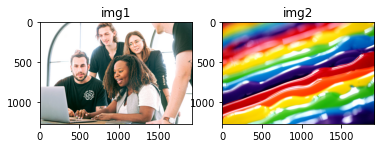

In [3]:
people_path = path.join("res", "people.jpg")
color_path = path.join("res", "overlay.jpg")

img = cv2.imread(people_path)
img_color = cv2.imread(color_path)

fig, ax = plt.subplots(1,2)
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), ax[0].set_title('img1')
ax[1].imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)), ax[1].set_title('img2')
plt.show()

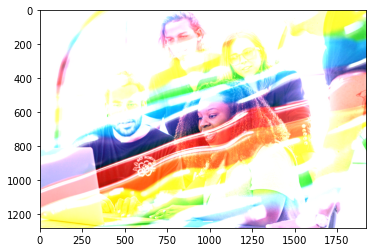

In [119]:
# Add two images

img_add = cv2.add(img, img_color)
# img_add = img + img_color

plt.imshow(cv2.cvtColor(img_add, cv2.COLOR_BGR2RGB))
plt.show()

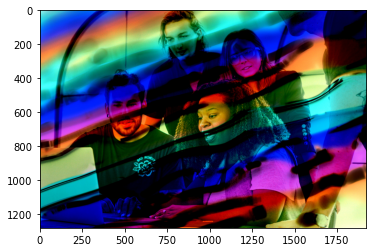

In [121]:
# Sub two images

img_sub = cv2.subtract(img, img_color)
# img_sub = img - img_color

plt.imshow(cv2.cvtColor(img_sub, cv2.COLOR_BGR2RGB))
plt.show()

#### Blending
- img = alpha * img1 + (1 - alpha) * img2
- 0 > alpha > 1
- addweighted
  - dst = img1 * alpha + img2 * beta + gamma

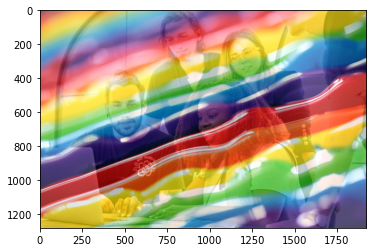

In [122]:
# Blend two images

img_blend = cv2.addWeighted(img, 0.3, img_color, 0.7, 0)

plt.imshow(cv2.cvtColor(img_blend, cv2.COLOR_BGR2RGB))
plt.show()

## Border detection

- Image filters, convolutions.
- Image gradient theory.
- Sobel & Laplacian filter.

In [124]:
# Show images
def show_image(sub, image, title):
    plt.subplot(2, 2, sub)
    plt.imshow(image, cmap = 'gray')
    title_obj = plt.title(title)
    plt.setp(title_obj, color='w')
    plt.xticks([])
    plt.yticks([])

In [125]:
# load arrows img
arrows_path = path.join("res", "arrows.jpg")
img = cv2.imread(arrows_path, 0)

- Grayscale image, CV_64F format
- Sobel (image, color depth, derivative orders x, y, kernel size)
   - Horizontal
   - Vertical
- Laplacian (image, color depth)
- Canny

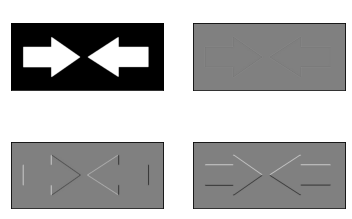

In [126]:
# Apply filters
laplacian = cv2.Laplacian(img, cv2.CV_64F)

sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)

show_image(1, img, 'Original')
show_image(2, laplacian, 'Laplacian')
show_image(3, sobel_x, 'Sobel X')
show_image(4, sobel_y, 'Sobel Y')

plt.show()

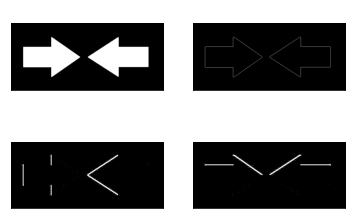

In [127]:
# Apply filters with only 8 bits per pixel
laplacian = cv2.Laplacian(img, cv2.CV_8U)

sobel_x = cv2.Sobel(img, cv2.CV_8U, 1, 0, ksize=5)
sobel_y = cv2.Sobel(img, cv2.CV_8U, 0, 1, ksize=5)

show_image(1, img, 'Original')
show_image(2, laplacian, 'Laplacian')
show_image(3, sobel_x, 'Sobel X')
show_image(4, sobel_y, 'Sobel Y')

plt.show()

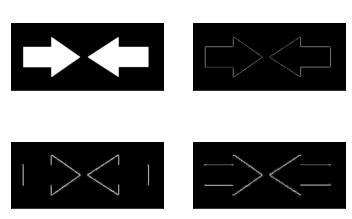

In [128]:
laplacian = cv2.Laplacian(img, cv2.CV_64F)
laplacian = np.uint8(np.absolute(laplacian))

sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
sobel_x = np.uint8(np.absolute(sobel_x))

sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
sobel_y = np.uint8(np.absolute(sobel_y))

show_image(1, img, 'Original')
show_image(2, laplacian, 'Laplacian')
show_image(3, sobel_x, 'Sobel X')
show_image(4, sobel_y, 'Sobel Y')

plt.show()

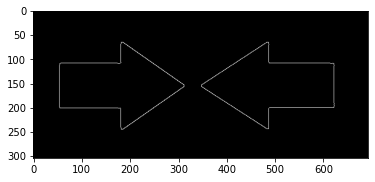

In [129]:
down_threshold = 50
up_threshold = 150

canny = cv2.Canny(img,down_threshold,up_threshold)
plt.imshow(canny, cmap='gray')
plt.show()

## Image segmentation

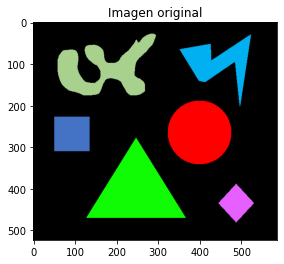

In [1]:
# SEGMENTACIÓN MEDIANTE THRESHOLDING
# Read an image
import matplotlib.pyplot as plt
import cv2
img = cv2.imread('images/figuras.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb, cmap='gray')
plt.title('Imagen original')
plt.show()

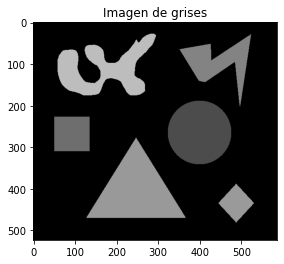

In [2]:
# Convertimos la imagen a escala de grises
import numpy as np
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#gray_img = cv2.imread('figuras.png', 0) # Una forma de leer la imagen directamente en escala de grises

plt.imshow(gray_img, cmap='gray')
plt.title('Imagen de grises')
plt.show()

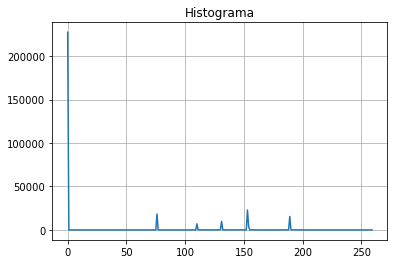

In [3]:
# Calculamos el histograma
hist = cv2.calcHist([gray_img], [0], None, [260], [0, 260]) # [0] son los canales, None la máscara

plt.plot(hist)
plt.grid()
plt.title('Histograma')
plt.show()

# Otra forma de mostrar el histograma (solo visualización)
# plt.hist(gray_img.ravel(), bins=50)
# plt.grid(True)
# plt.show()

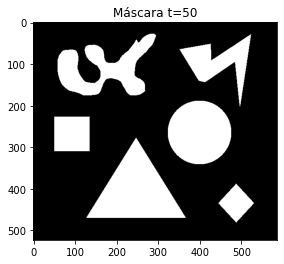

[  0 255]


In [8]:
# Fijamos el umbral en base al histograma anterior
t = 50

# Extreaemos la máscara binaria
maxim = int(np.max(np.unique(gray_img)))
_, mask = cv2.threshold(gray_img, t, int(maxim), cv2.THRESH_BINARY)

# Otra formas de extraer la máscara 
# mask = gray_img.copy()
# mask = mask>t

# Visualizamos para corroborar
plt.imshow(mask, cmap='gray')
plt.title('Máscara t=' + str(t))
plt.show()

print(np.unique(mask)) # Atent@s a los formatos (bool, uint8, etc.)

[0 1]


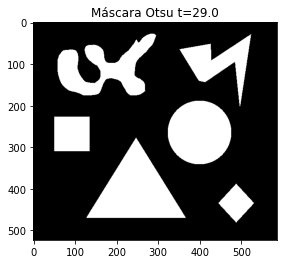

In [11]:
# Fijamos el umbral con el método de OTSU
t, mask = cv2.threshold(gray_img,0,1,cv2.THRESH_OTSU) # 0 es por defecto y 1 es el valor máximo de la máscara
print(np.unique(mask))

# Visualizamos para corroborar que se obtiene el mismo resultado
plt.imshow(mask, cmap='gray')
plt.title('Máscara Otsu t=' + str(t))
plt.show()

In [ ]:
###############################################################################################################################

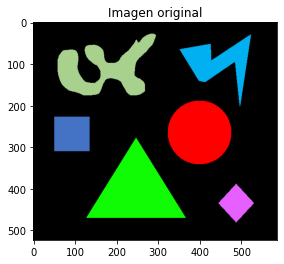

In [12]:
# SEGMENTACIÓN MEDIANTE CONVERSIONES DE COLOR

# Imaginamos que queremos segmentar únicamente el círculo
img = cv2.imread('images/figuras.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb, cmap='gray')
plt.title('Imagen original')
plt.show()

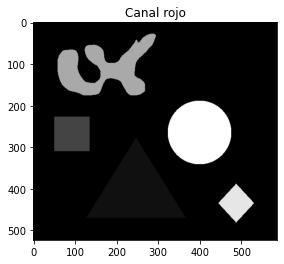

In [13]:
# Obtenemos el canal rojo
R = img[:,:,2]

plt.imshow(R, cmap='gray')
plt.title('Canal rojo')
plt.show()

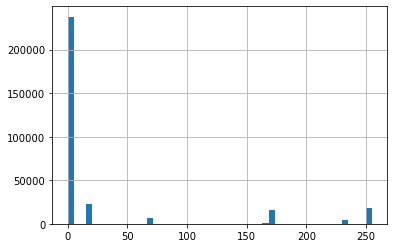

255


In [14]:
# Observamos el histograma
plt.hist(R.ravel(), bins=50)
plt.grid(True)
plt.show()
print(np.max(R))

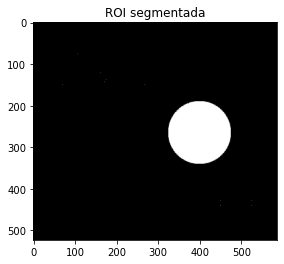

In [15]:
# Fijamos el umbral y extraemos la máscara
t=np.max(R)
mask = R.copy()
mask[mask<t] = 0

plt.imshow(mask, cmap='gray')
plt.title('ROI segmentada')
plt.show()

In [16]:
###############################################################################################################################

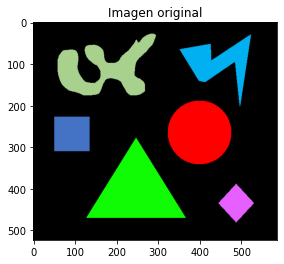

In [17]:
# SEGMENTACIÓN SEMÁNTICA CON DETECCIÓN DE BORDES
img = cv2.imread('images/figuras.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title('Imagen original')
plt.show()

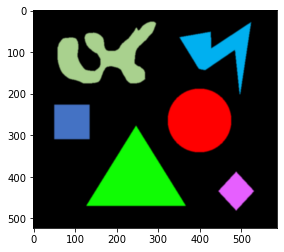

In [18]:
# Aplicamos un filtro gaussiano para emborronar las altas frecuencias
img_gaus = cv2.GaussianBlur(img_rgb, (5,5), 0) # (5x5) es el tamaño del filtro y 0 es la desviación estándar
plt.imshow(img_gaus, cmap='gray')
plt.show()

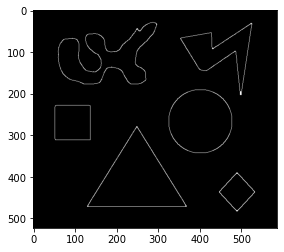

In [19]:
# Detección de bordes de Canny
canny = cv2.Canny(img_gaus, 255/3, 255) # minValue and maxValue. Canny recomiendo que minValue sea 3 veces mayor que maxValue
kernel = np.ones((2,2), 'uint8')
canny = cv2.dilate(canny, kernel, iterations=2)
canny = cv2.erode(canny, kernel, iterations=2)

plt.imshow(canny, cmap='gray')
plt.show()

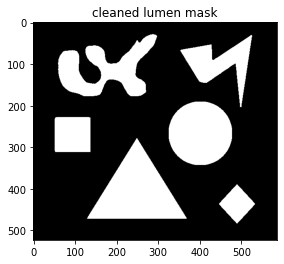

In [20]:
# Rellenar objetos (solo rellena si no están en contacto con el límite de la imagen)
from scipy.ndimage.morphology import binary_fill_holes as bfh
bordes = canny.copy()
filled_bordes = bfh(bordes)

plt.imshow(filled_bordes.astype('uint8'), cmap='gray')
plt.title('cleaned lumen mask')
plt.show()

In [21]:
###############################################################################################################################

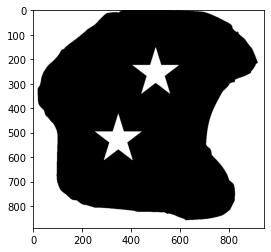

In [22]:
# REGION GROWING
from skimage import io
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('images/estrellas.png', 0)

plt.imshow(img, cmap='gray')
plt.show()

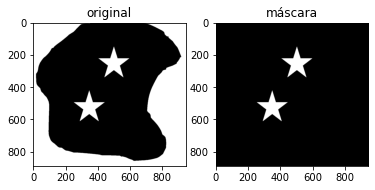

In [23]:
# Crear una copia de la imagen
mask = img.copy()

# Definir una imagen negra de referencia
h, w = img.shape
ref = np.zeros((h+2, w+2), np.uint8)

# Fijar la semilla. En este caso en la esquina superior izquierda (posición 0,0) para rellenar a partir de ahí
cv2.floodFill(mask, ref, (0,0), 0); # Como nos interesa rellenar de negro, utilizamos el 0 en la última posición

fig, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray'), ax[0].set_title('original')
ax[1].imshow(mask, cmap='gray'), ax[1].set_title('máscara')
plt.show()

## Shape descriptors

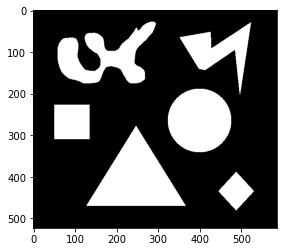

In [26]:
# En primer lugar, obtenemos la máscara de la imagen original mediante la umbralización con Otsu
import matplotlib.pyplot as plt
import cv2
import numpy as np
img = cv2.imread('images/figuras.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(img_gray,0,1,cv2.THRESH_OTSU)

plt.imshow(mask, cmap='gray')
plt.show()

número de objetos:  6
posibles valores de intensidad:  [0 1 2 3 4 5 6]


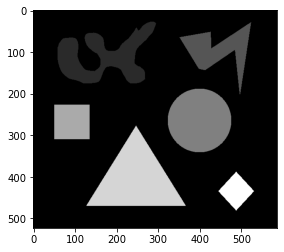

In [27]:
# Convertimos la imagen binaria en una imagen de etiquetas para tener acceso a cada objeto por separado
from skimage.measure import label

lab, num = label(mask, return_num=True) # a cada objetido diferente le pone una etiqueta

# Importante:
# En 'num' devuelve 6 valores correspondientes a los 6 objetos que hay en la imagen.
# Sin embargo, 'lab' contiene hasta 7 valores diferentes, ya que también tiene en cuenta el fondo de la imagen.
print('número de objetos: ', num)
v,c = np.unique(lab, return_counts=True)
print('posibles valores de intensidad: ', v)

plt.imshow(lab, cmap='gray')
plt.show()

In [28]:
print(np.unique(lab))

[0 1 2 3 4 5 6]


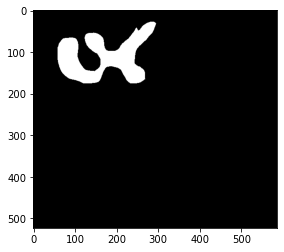

In [35]:
# Podemos acceder de manera independiente al objeto que nos interese a partir de su etiqueta correspondiente
objeto = lab == 1
objeto = objeto.astype('uint8')
plt.imshow(objeto, cmap='gray')
plt.show()

(28, 59, 176, 296)


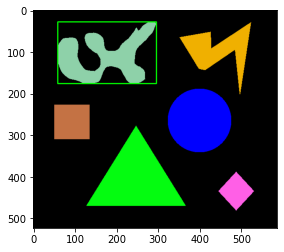

In [44]:
from skimage.measure import regionprops
# https://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.regionprops

# Después, podemos extraer la bounding box de dicho objeto
prop = regionprops(objeto)
bbox = prop[0].bbox
print(bbox)
start_point = (bbox[1], bbox[0])
end_point = (bbox[3], bbox[2])
window = cv2.rectangle(img.copy(), start_point, end_point, (0, 255, 0), 2) # no confundir con croping
                     
plt.imshow(window, cmap='gray')
plt.show()

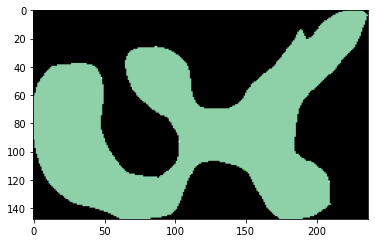

In [41]:
crop = img[bbox[0]:bbox[2],bbox[1]:bbox[3]]
plt.imshow(crop, cmap='gray')
plt.show()

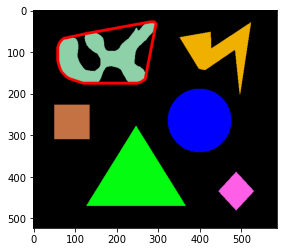

In [31]:
# Y la convex hull image
from skimage.morphology import convex_hull_image

convex_image = convex_hull_image(objeto)
convex_image = convex_image.astype('uint8')
# plt.imshow(convex_image, cmap='gray')
# plt.show()

conts,_ = cv2.findContours(convex_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) # Encontramos los contornos en una máscara 
imagen = cv2.drawContours(img.copy(), conts, -1, (255,0,0), 5) # Dibujamos los contornos
                     
plt.imshow(imagen, cmap='gray')
plt.show()

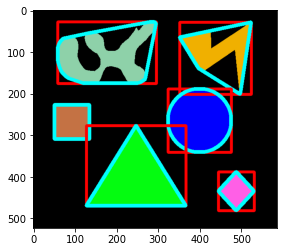

In [32]:
# Repetimos el proceso completo para todos los objetos de la imagen
imagen = img.copy()
for i in range(1, num+1): 
    objeto = lab == i
    objeto = objeto.astype('uint8')
    
    # bbox
    prop = regionprops(objeto)
    bbox = prop[0].bbox
    imagen = cv2.rectangle(imagen, (bbox[1], bbox[0]), (bbox[3], bbox[2]), (255, 0, 0), 5)
    
    # covex hull
    convex_image = convex_hull_image(objeto)
    convex_image = convex_image.astype('uint8')
    conts,_ = cv2.findContours(convex_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    imagen = cv2.drawContours(imagen, conts, -1, (0,255,255), 8)

plt.imshow(imagen, cmap='gray')
plt.show()

In [33]:
# Vamos a extraer diferentes descriptores geométricos que nos ayudarán a caracterizar los objetos.
# pip install tabulate
from tabulate import tabulate
import math

new_lab, new_num = label(mask, return_num=True)

# Extraemos las característicias geométricas
headers = ['','Raro', 'Rayo', 'Círculo', 'Cuadrado', 'Triángulo', 'Rombo']
A,BB,CA,E,ED,EX,MA,MiA,OR,P,S,CO,R = ['area'], ['bbox_area'], ['convex_area'], ['eccentricity'], ['equiv_diameter'], \
['extent'], ['major_axis'], ['minor_axis'], ['orientation'], ['perimeter'], ['solidity'], ['compactness'], ['rectangularity']

for i in range(1,new_num+1):
    objeto = new_lab == i
    prop = regionprops(objeto.astype(np.uint8))
    
    A.append(np.round(prop[0].area, 4))
    BB.append(np.round(prop[0].bbox_area, 4))
    CA.append(np.round(prop[0].convex_area, 4))
    E.append(np.round(prop[0].eccentricity, 4))
    ED.append(np.round(prop[0].equivalent_diameter, 4))
    EX.append(np.round(prop[0].extent, 4))
    MA.append(np.round(prop[0].major_axis_length, 4))
    MiA.append(np.round(prop[0].minor_axis_length, 4))
    OR.append(np.round(prop[0].orientation, 4))
    P.append(np.round(prop[0].perimeter, 4))
    S.append(np.round(prop[0].solidity, 4))
    CO.append(np.round(4*math.pi*prop[0].area/prop[0].perimeter**2, 4))
    R.append(np.round(prop[0].area/prop[0].bbox_area, 4))


my_data = [tuple(A), tuple(BB), tuple(CA), tuple(E), tuple(ED), tuple(EX), \
          tuple(MA), tuple(MiA), tuple(OR), tuple(P), tuple(S), tuple(CO), tuple(R)]

print(tabulate(my_data, headers=headers))

                      Raro        Rayo     Círculo    Cuadrado    Triángulo      Rombo
--------------  ----------  ----------  ----------  ----------  -----------  ---------
area            16198       10282       18344        7055        23119       4018
bbox_area       35076       29756       23104        7055        46127       7998
convex_area     27405       16959       18488        7055        23307       4102
eccentricity        0.8556      0.7941      0           0.2157       0.371      0.3866
equiv_diameter    143.61      114.418     152.828      94.7771     171.569     71.5254
extent              0.4618      0.3455      0.794       1            0.5012     0.5024
major_axis        268.45      186.995     152.828      98.1428     195.774     76.1969
minor_axis        138.975     113.644     152.828      95.8332     181.801     70.2735
orientation        -1.4236      1.5298      0.7854      1.5708       1.5708     0
perimeter        1029.77      736.02      503.245     332      

## Texture descriptors

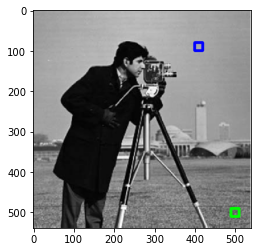

In [1]:
# En primer lugar, obtenemos la máscara de la imagen original mediante la umbralización con Otsu
import matplotlib.pyplot as plt
import cv2
import numpy as np
img = cv2.imread('images/photographer.png')

window = cv2.rectangle(img.copy(), (400,80), (420,100), (0, 0, 255), 5)
window = cv2.rectangle(window, (490,490), (510,510), (0, 255, 0), 5)
plt.imshow(window, cmap='gray')
plt.show()

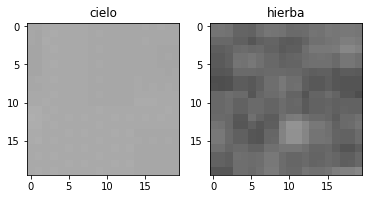

In [2]:
# Seleccionamos una región del cielo y una de la hierba
cielo = img[80:100, 400:420]
hierba = img[490:510, 490:510]

fig, ax = plt.subplots(1,2)
ax[0].imshow(cielo, cmap='gray')
ax[0].set_title('cielo')
ax[1].imshow(hierba, cmap='gray')
ax[1].set_title('hierba')
plt.show()

In [3]:
##############################################################################################################################

In [4]:
# MATRIZ DE COOCURRENCIA (Gray-Level Cooccurence Matrix - GLCM)
from tabulate import tabulate
from skimage.feature import greycomatrix, greycoprops
headers = ['','cielo', 'hierba']
CN, DIS, H, ASM, E, COR = ['contraste'], ['disimilitud'], ['homogeneidad'], ['ASM'], ['Energía'], ['Correlación']

patches = []
patches.append(cielo)
patches.append(hierba)

for i in range(len(patches)):
    image = cv2.cvtColor(patches[i], cv2.COLOR_BGR2GRAY)
    GLCM = greycomatrix(image, distances=[2], angles=[0], levels=np.max(image)+1, symmetric=True, normed=True)
    # print(np.shape(GLCM))
    # plt.imshow(GLCM[:,:,0,0], cmap='gray')
    # plt.show()
    CN.append(greycoprops(GLCM, 'contrast')[0,0])
    DIS.append(greycoprops(GLCM, 'dissimilarity')[0,0])
    H.append(greycoprops(GLCM, 'homogeneity')[0,0])
    ASM.append(greycoprops(GLCM, 'ASM')[0,0])
    E.append(greycoprops(GLCM, 'energy')[0,0])
    COR.append(greycoprops(GLCM, 'correlation')[0,0])

my_data = [tuple(CN), tuple(DIS), tuple(H), tuple(ASM), tuple(E), tuple(COR)]

print(tabulate(my_data, headers=headers))

                 cielo        hierba
------------  --------  ------------
contraste     2.15556   143.1
disimilitud   0.788889    9.25
homogeneidad  0.727447    0.113349
ASM           0.217087    0.00502701
Energía       0.465926    0.0709014
Correlación   0.517086    0.527263


In [5]:
##############################################################################################################################

(1672, 128)


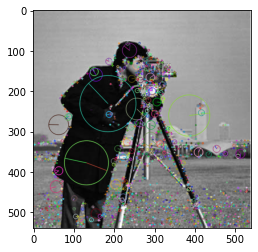

In [6]:
# SIFT algorithm
img = cv2.imread('images/photographer.png', 0)

# Definición del algoritmo
sift = cv2.SIFT_create()

# Identificamos los puntos de interés
kp = sift.detect(img, None)

# Extraemos el descriptor para obtener el fingreprint
kp, des = sift.compute(img, kp)
print(np.shape(des))
# print(des) # Matriz donde las filas son los keypoints y las columnas las características de dichos puntos clave

# Visualizamos los puntos de interés
img_int=cv2.drawKeypoints(img, kp, img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img_int)
plt.show()

0.01692507602274418
(1323, 128)


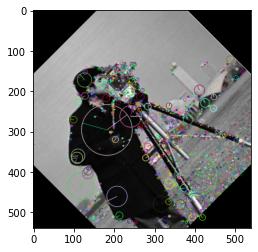

In [7]:
# SIFT algorithm
rows, cols = img.shape

M = cv2.getRotationMatrix2D((cols/2,rows/2),angle=45,scale=1)
img_2 = cv2.warpAffine(img,M,(cols,rows))

# Identificamos los puntos de interés
kp_2 = sift.detect(img_2, None)
k = kp_2[0]
print(k.response)


# Extraemos el descriptor para obtener el fingreprint
kp_2, des_2 = sift.compute(img_2, kp_2)
print(np.shape(des_2))

# Visualizamos los puntos de interés
img_int_2=cv2.drawKeypoints(img_2, kp_2, img_2.copy(), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img_int_2)
plt.show()

(968,)


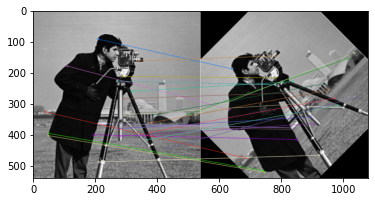

In [8]:
# feature matching
from skimage import io

bf = cv2.BFMatcher.create(cv2.NORM_L1, crossCheck=True)

matches = bf.match(des, des_2)
matches = sorted(matches, key = lambda x:x.distance)

print(np.shape(matches))

img_match = cv2.drawMatches(img, kp, img_2, kp_2, matches[:25], img_2, flags=10)
plt.imshow(img_match)
plt.show()

In [9]:
##############################################################################################################################

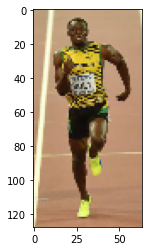

In [10]:
# HISTOGRAM OF ORIENTED GRADIENTS

# En primer lugar, obtenemos la máscara de la imagen original mediante la umbralización con Otsu
from skimage import io
img = io.imread('images/pedestrian.jpg')
img = np.float32(img/255)
crop = img[75:550,475:700]
crop = cv2.resize(crop, (64, 128))

plt.imshow(crop, cmap='gray')
plt.show()

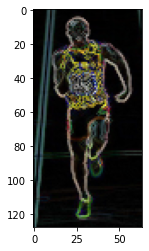

In [11]:
# Calculamos el gradiente con el kernel de Sobel
crop = np.float32(crop)
gx = cv2.Sobel(crop, cv2.CV_32F, 1, 0, ksize=1)
gy = cv2.Sobel(crop, cv2.CV_32F, 0, 1, ksize=1)

# Calculamos la magnitud y la dirección del gradiente
mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)

# Visualizamos la imagen obtenida en la magnitud del gradiente
mag = mag/np.max(mag)
plt.imshow(mag, cmap='gray')
plt.show()

In [12]:
# Cálculo del desriptor: Histogram of Oriented Gradients
from skimage.feature import hog

# En la última versión de skimage habrá que utilizar una imagen de entrada en escala de grises o
# definir el flag: channel_axis=2 para trabajar en el eje de los canales
H = hog(crop, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), transform_sqrt=True, block_norm="L1")
np.shape(H)

(3780,)

In [13]:
##############################################################################################################################

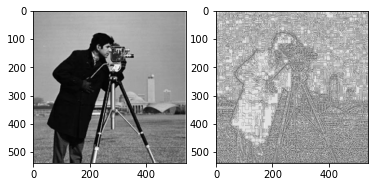

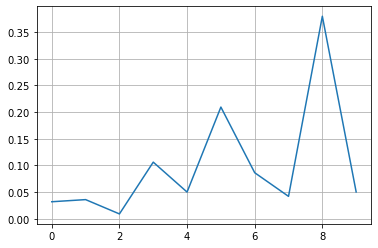

In [14]:
# LOCAL BINARY PATTERNS (LBP)
from skimage.feature import local_binary_pattern
img = cv2.imread('images/photographer.png')

# Definimos los parámetros iniciales
R = 1 # Radio
P = 8*R # Número de píxeles vecinos
epsilon = 1e-7 # Para normalizar el histograma

# Extraemos la imagen LBP
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
lbp_image = local_binary_pattern(img_gray, P, R, method='uniform')
a,b = np.unique(lbp_image, return_counts=True)

# Calculamos el histograma
lbp_image = np.uint8(lbp_image)
hist = cv2.calcHist([lbp_image.ravel()], [0], None, [P+2], [0, P+2])

# Normalizamos el histograma
hist = hist.astype("float")
hist /= (hist.sum() + epsilon)

# Los P+2=10 bins del histograma serán los 10 atributos que nos permitirán caracterizar una imagen

# Visualizamos la imagen LBP
figs, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray')
ax[1].imshow(lbp_image, cmap='gray')
plt.show()

# Visualizamos el histograma
plt.plot(hist)
plt.grid(True)
plt.show()

## Other:

### Mark points with the mouse - sometimes it crashes when trying to close it


In [5]:
# Double click to select a point, and then click 'p' to print it

def draw_circle(event,x,y,flags,param):
    global mouseX,mouseY
    if event == cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(img,(x,y),3,(255,0,0),-1)
        mouseX,mouseY = x,y
        print (f'({mouseX}, {mouseY})')

In [6]:
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while(True):
    cv2.imshow('image',img)
    k = cv2.waitKey(20) & 0xFF
    if k == 27: # tecla esc
        break
    elif k == ord('p'):
        print (mouseX,mouseY)
        
# Destroy all the windows
cv2.destroyAllWindows()

(251, 399)
(972, 266)


### Access the webcam and apply Canny border detector


Change thresholds by hand while playing with:
- down_threshold: o, p  (+,-) 
- up_threshold:   l, ;  (+,-)

In [ ]:
# define a video capture object
vid = cv2.VideoCapture(0)
down_threshold = 0
up_threshold = 150

print(vid.read()[1].shape)
        
cv2.namedWindow('image')
cv2.setMouseCallback('image', draw_circle)

while(True):
    ret, frame = vid.read()
  
    frame = cv2.flip(frame, 1) # volteamos la imagen
    
    # convertimos a BW y aplicamos gaussian blur para que 
    # los bordes se detecten con mayor facilidad
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # to BW
    frame = cv2.GaussianBlur(frame,(5,5),0) # gaussian blur de 7x7
#     frame = (255-frame)
    edges = cv2.Canny(frame,down_threshold,up_threshold)
#     resized = cv2.resize(frame, (75,75), interpolation = cv2.INTER_AREA)
#     resized = cv2.resize(resized, (1024,1024), interpolation = cv2.INTER_AREA)
    

    # Change thresholds by hand while playing
    if cv2.waitKey(1) & 0xFF == ord('p'):
        if up_threshold <= 234:
            up_threshold = up_threshold + 10
    if cv2.waitKey(1) & 0xFF == ord('o'):
        if  up_threshold >= 10:
            up_threshold = up_threshold - 10
    if cv2.waitKey(1) & 0xFF == ord('ñ'):
        if down_threshold <= 234:
            down_threshold = down_threshold + 10
    if cv2.waitKey(1) & 0xFF == ord('l'):
        if down_threshold >= 10:
            down_threshold = down_threshold - 10
        
    font = cv2.FONT_HERSHEY_SIMPLEX
    bottomLeftCornerOfText1 = (10,440)
    bottomLeftCornerOfText2 = (10,470)

    # print the threshold
    cv2.putText(edges,"down_threshold: "+str(down_threshold), bottomLeftCornerOfText1, cv2.FONT_HERSHEY_SIMPLEX, 1, 500, thickness=2)
    cv2.putText(edges,"up_threshold:   "+str(up_threshold), bottomLeftCornerOfText2, cv2.FONT_HERSHEY_SIMPLEX, 1, 500, thickness=2)

    cv2.imshow('image', edges)
    
    # close ESC
    if cv2.waitKey(1) & 0xFF == 27:
        break
        
    
# After the loop release the cap object
vid.release()
# Destroy all the windows
cv2.destroyAllWindows()

(480, 640, 3)
(370, 154)
(328, 230)


### Face detection


- Mediapipe
- Caffe2 (Better Confidence score than Mediapipe with almost same fps)
  - Deep Learning
  - Definition of the model architecture https://github.com/opencv/opencv/blob/master/samples/dnn/face_detector/deploy.prototxt
  - Model with RN layer weights https://github.com/opencv/opencv_3rdparty/tree/dnn_samples_face_detector_20170830
  


1. mediapipe

In [ ]:
# from image/video
import cv2
import mediapipe as mp
import time

cap = cv2.VideoCapture("res/video.mp4")
pTime = 0

mpFaceDetection = mp.solutions.face_detection
mpDraw = mp.solutions.drawing_utils
faceDetection = mpFaceDetection.FaceDetection(0.75)

while True:
    success, img = cap.read()

    if img is None:
        break
        
    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = faceDetection.process(img)
    #print(results)

    if results.detections:
        for id, detection in enumerate(results.detections):
            # mpDraw.draw_detection(img, detection)
            # print(id, detection)
            # print(detection.score)
            # print(detection.location_data.relative_bounding_box)
            bboxC = detection.location_data.relative_bounding_box
            ih, iw, ic = img.shape
            bbox = int(bboxC.xmin * iw), int(bboxC.ymin * ih), int(bboxC.width * iw), int(bboxC.height * ih)
            cv2.rectangle(img, bbox, (255, 0, 255), 2)
            #cv2.putText(img, f'{int(detection.score&#91;0] * 100)}%', (bbox&#91;0], bbox&#91;1] - 20), cv2.FONT_HERSHEY_PLAIN, 2, (255, 0, 255), 2)

    cTime = time.time()
    fps = 1 / (cTime - pTime)
    pTime = cTime
                        
    cv2.putText(img, f'FPS: {int(fps)}', (20, 70), cv2.FONT_HERSHEY_PLAIN, 3, (0, 255, 0), 2)
    cv2.imshow("Image", img)
    cv2.waitKey(1)

# After the loop release the cap object
cap.release()
# Destroy all the windows
cv2.destroyAllWindows()

- Face detection on Video (Webcam)

In [78]:
import cv2
import mediapipe as mp
import time

cap = cv2.VideoCapture(0)
pTime = 0

mpFaceDetection = mp.solutions.face_detection
mpDraw = mp.solutions.drawing_utils
confidence_threshold = 0.8
faceDetection = mpFaceDetection.FaceDetection(confidence_threshold)

while True:
    success, img = cap.read()

    imgRGB = cv2.flip(img, 1) #cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = faceDetection.process(imgRGB)
    # print(results)

    if results.detections:
        for id, detection in enumerate(results.detections):
            # mpDraw.draw_detection(img, detection)
            # print(id, detection)
            # print(detection.score)
            # print(detection.location_data.relative_bounding_box)
            bboxC = detection.location_data.relative_bounding_box
            ih, iw, ic = img.shape
            #print(img.shape)
            bbox = int(-bboxC.xmin * iw + 320 + (bboxC.width * iw)/2.5), int(bboxC.ymin * ih), int(bboxC.width * iw), int(bboxC.height * ih)
            #print(bbox)
            cv2.rectangle(img, bbox, (0, 0, 255), 2)
            text = f"{detection.score[0] * 100:.2f}"        

            cv2.putText(img, text, (bbox[0], bbox[1] - 20), cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 255), 2)

        cTime = time.time()
        fps = 1 / (cTime - pTime)
        pTime = cTime

        cv2.putText(img, f'FPS: {int(fps)}', (20, 70), cv2.FONT_HERSHEY_PLAIN, 3, (0, 255, 0), 2)
        cv2.imshow("Image", img)

                            # close ESC
        if cv2.waitKey(1) & 0xFF == 27:
            break
            
# After the loop release the cap object
cap.release()
# Destroy all the windows
cv2.destroyAllWindows()

2. Caffe

In [ ]:
proto_path = path.join("res", "deploy.prototxt.txt")
model_path = path.join("res", "res10_300x300_ssd_iter_140000.caffemodel")
people_path = path.join("res", "people.jpg")

In [ ]:
# Load model into DNN from OpenCV
net = cv2.dnn.readNetFromCaffe(proto_path, model_path)

(1280, 1920)


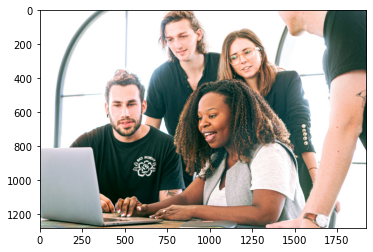

In [ ]:
# Image to analyze
img = cv2.imread(people_path)
(h, w) = img.shape[:2]
print((h, w))

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
# Preprocess image resize 300x300, scale factor, image_size, mean values color channels
blob = cv2.dnn.blobFromImage(cv2.resize(img, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))

In [ ]:
# Send image to the neural network
net.setInput(blob)
detections = net.forward()

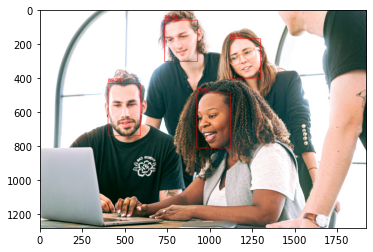

Nº of detections: 4


In [ ]:
# - Array of detections
# - Confidence threshold

confidence_threshold = 0.8
num_faces = 0

for i in range(0, detections.shape[2]):
    confidence = detections[0, 0, i, 2]
    if confidence > confidence_threshold:
        num_faces += 1
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")
        text = f"{confidence * 100:.2f}"        
        y = startY - 10 if startY - 10 > 10 else startY + 10
        cv2.rectangle(img, (startX, startY), (endX, endY),(0, 0, 255), 2)
        cv2.putText(img, text, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.85, (0, 0, 255), 2)

# cv2.imshow('Image', img)
# cv2.waitKey(0)
# cv2.destroyWindow('Image')

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

print(f'Nº of detections: {num_faces}')

- Face detection on Video (Webcam)

In [79]:
import cv2
import numpy as np

from os import path
import time

proto_path = path.join("res", "deploy.prototxt.txt")
model_path = path.join("res", "res10_300x300_ssd_iter_140000.caffemodel")

# Load model into DNN from OpenCV
net = cv2.dnn.readNetFromCaffe(proto_path, model_path)

# define a video capture object
vid = cv2.VideoCapture(0)
pTime = 0
print(vid.read()[1].shape)

(h, w) = vid.read()[1].shape[0], vid.read()[1].shape[1] 

# cv2.namedWindow('image')
# cv2.setMouseCallback('image', draw_circle)

confidence_threshold = 0.8

while(True):
    ret, frame = vid.read()
    
    frame = cv2.flip(frame, 1) 
    
    # Preprocess image resize 300x300, scale factor, image_size, mean values color channels
    blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))
    # Send image to the neural network
    net.setInput(blob)
    detections = net.forward()
    
    # draw detections
    for i in range(0, detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > confidence_threshold:
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")
            text = f"{confidence * 100:.2f}"        
            y = startY - 10 if startY - 10 > 10 else startY + 10
            cv2.rectangle(frame, (startX, startY), (endX, endY),(0, 0, 255), 2)
            cv2.putText(frame, text, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.85, (0, 0, 255), 2)
            # print(startX, startY, endX, endY)
    
    cTime = time.time()
    fps = 1 / (cTime - pTime)
    pTime = cTime

    cv2.putText(frame, f'FPS: {int(fps)}', (20, 70), cv2.FONT_HERSHEY_PLAIN, 3, (0, 255, 0), 2)

    cv2.imshow('image', frame)
    
    # close ESC
    if cv2.waitKey(1) & 0xFF == 27:
        break
        
# After the loop release the cap object
vid.release()
# Destroy all the windows
cv2.destroyAllWindows()

(480, 640, 3)
